Solve for the ODE 
$$\theta'' + \theta = 0$$
where $ \theta(0) = 0 $ And $ \theta(1) = 1$ 

In [24]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [10, 15]

In [25]:
def A(x):
    return 0
def B(x, lamda):
    return -lamda*x
def C(x):
    return 0

def get_a(x, h):
    return 1/(h**2) - A(x)/(2.0 * h)
def get_b(x, h, lamda):
    return - 2/(h**2) + B(x, lamda)
def get_c(x, h):
    return 1/(h**2) + A(x)/(2.0 * h)

In [26]:
def ThomasAlgorithm(a, b, c, d, n):
    c_dash = np.zeros(n-1)
    d_dash = np.zeros(n-1)
    c_dash[0] = c[0] / b[0]
    d_dash[0] = d[0] / b[0]
    for itr in range(1, n-1):
        c_dash[itr] = c[itr] / (b[itr] - a[itr] * c_dash[itr-1])
        d_dash[itr] = (d[itr] - a[itr]*d_dash[itr-1]) / (b[itr] - a[itr] * c_dash[itr-1])
    
    y = np.zeros(n-1)
    y[n-2] = d_dash[n-2]
    
    for itr in reversed(range(n-2)):
        y[itr] = d_dash[itr] - c_dash[itr] * y[itr+1]
    
    return y

In [27]:
def TridiagonalBVP(x0, xn, h, n, lamda):
    x = [(x0 + itr * h) for itr in range(1, n)]
    #print x[n-1]
    a = [get_a(itr, h) for itr in x]
    b = [get_b(itr, h, lamda) for itr in x]
    c = [get_c(itr, h) for itr in x]
    d = [C(itr) for itr in x]
    d[0] = d[0] - a[0]*0
    d[n-2] = d[n-2] - c[n-2]*1
    return ThomasAlgorithm(a, b, c, d, n)

def func(x0, xn, h = 0.1):
    return np.arange(x0, xn + h, h)

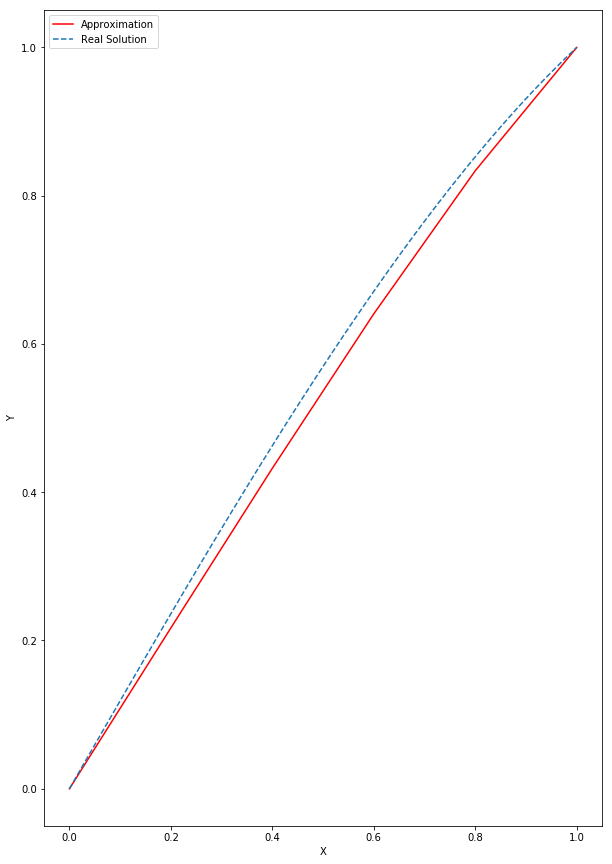

In [35]:
x0 = 0.0
xn = 1.0
steps = [0.2]
f = lambda xn, x0, step : int(np.ceil((xn-x0)/step))
colors = ['r']
lamda = -1
# Creating vector that stores the steps
labels = [ 'Approximation', 'Real Solution']
for step in steps:
    y = []
    x_range = func(x0, xn, step)
#     print(x_range)
    n = int(np.ceil((xn - x0)/step))
#     print(n)
    y[1:n] = TridiagonalBVP(x0, xn, step, n, lamda)
#     print(y)
    y.insert(0, 0)

    y.append(1)

    plt.xlabel('X')
    plt.ylabel('Y')
    i = steps.index(step)
    plt.plot( x_range, y, colors[i], label=labels[0])
    plt.gca().legend(labels)
    
def sinx(x0, xn, h = 0.01):
    x = func(x0, xn, h)
    y = np.sin(func(x0, xn, h))/np.sin(1)
#     print(y)
    plt.plot(x, y, '--', label=labels[1])
    plt.gca().legend(labels)

sinx(x0, xn)